In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. KNN을 활용한 분류 실습(지도학습)

#### 1. 학습할 데이터를 로드

In [2]:
#가상 데이터를 로드
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, n_samples=30, random_state=4)
X.shape, y.shape

((30, 2), (30,))

In [3]:
X, y

(array([[ 9.76566918,  1.27689813],
        [ 8.35760513,  0.99907772],
        [ 9.96346605,  4.59676542],
        [11.0329545 , -0.16816717],
        [11.54155807,  5.21116083],
        [ 9.95926647,  0.85665806],
        [ 8.69289001,  1.54322016],
        [ 8.1062269 ,  4.28695977],
        [ 8.30988863,  4.80623966],
        [11.93027136,  4.64866327],
        [ 9.67284681, -0.20283165],
        [ 8.34810316,  5.13415623],
        [ 8.67494727,  4.47573059],
        [ 9.17748385,  5.09283177],
        [10.24028948,  2.45544401],
        [ 8.68937095,  1.48709629],
        [ 8.92229526, -0.63993225],
        [ 9.49123469,  4.33224792],
        [ 9.25694192,  5.13284858],
        [ 7.99815287,  4.8525051 ],
        [ 8.18378052,  1.29564214],
        [ 8.7337095 ,  2.49162431],
        [ 9.32298256,  5.09840649],
        [10.06393839,  0.99078055],
        [ 9.50048972, -0.26430318],
        [ 8.34468785,  1.63824349],
        [10.97634432, -0.41632061],
        [ 9.50169345,  1.938

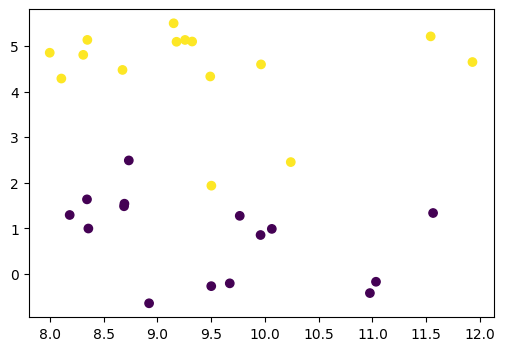

In [4]:
#값의 분포를 이해하기 위해 산점도를 그려보자. : plt.scatter(x, y)
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

#### 2. 데이터 분할

In [5]:
from sklearn.model_selection import train_test_split
#순서를 꼭 지킬것
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0,
                                                    test_size=0.25,
                                                    stratify=y )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22, 2), (8, 2), (22,), (8,))

#### 3. 모델링 (모델 생성, 학습)

In [7]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
#생성
knn = KNeighborsClassifier(n_neighbors=5)
#학습
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### 4. 성능평가

In [8]:
#평가
y_pred = knn.predict(X_test)
print(y_pred)
print(y_test)

[0 0 0 1 1 1 1 0]
[0 0 0 1 1 1 1 0]


In [9]:
#분류모델 생성후 scoer 함수를 이용하면 나오는 값이 정확도 이다.
train_sc = knn.score(X_train, y_train)
test_sc = knn.score(X_test, y_test)
print(f'knn의 성능은 train : {train_sc:.3f}, test : {test_sc:.3f}')

knn의 성능은 train : 0.909, test : 1.000


####  K 값의 선택

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
x_train.shape, x_test.shape

((112, 4), (38, 4))

In [11]:
k_range = range(1, 11)
train_score = []
test_score = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
    train_score.append(model.score(x_train, y_train))
    test_score.append(model.score(x_test, y_test))
    
print(train_score)
print(test_score)

[1.0, 0.9642857142857143, 0.9642857142857143, 0.9732142857142857, 0.9732142857142857, 0.9642857142857143, 0.9732142857142857, 0.9732142857142857, 0.9642857142857143, 0.9732142857142857]
[0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]


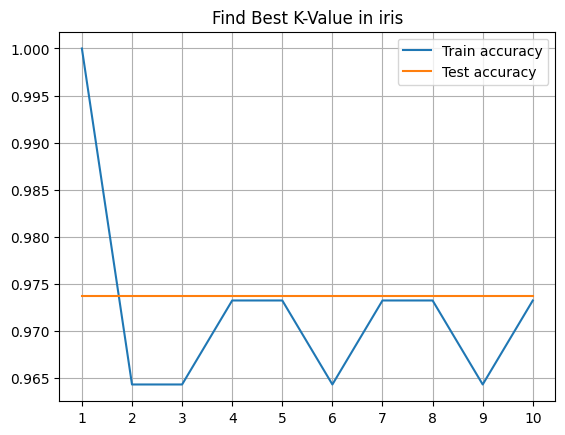

In [12]:
plt.plot(k_range, train_score, label='Train accuracy')
plt.plot(k_range, test_score, label='Test accuracy')
plt.xticks(k_range)

plt.title('Find Best K-Value in iris')
plt.legend()
plt.grid()
plt.show()

#### 표준화 정규화

In [13]:
import pandas as pd
iris_bunch = load_iris()
iris_df = pd.DataFrame(iris_bunch.data)
iris_df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


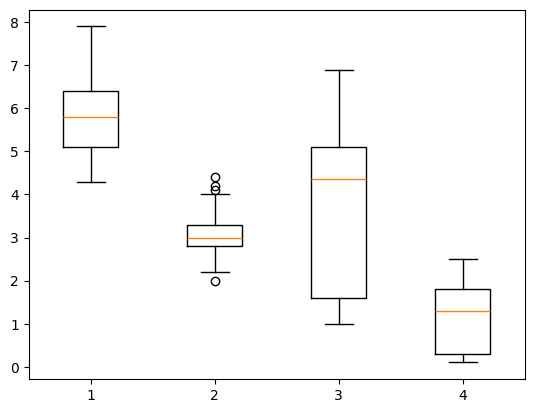

In [14]:
import matplotlib.pyplot as plt
plt.boxplot(iris_bunch.data)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
new_data = StandardScaler().fit_transform(iris_df)
round(pd.DataFrame(new_data).describe(), 2)

,0,1,2,3
count,150.00,150.00,150.00,150.00
mean,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.87,-2.43,-1.57,-1.45
25%,-0.90,-0.59,-1.23,-1.18
50%,-0.05,-0.13,0.34,0.13
75%,0.67,0.56,0.76,0.79
max,2.49,3.09,1.79,1.71


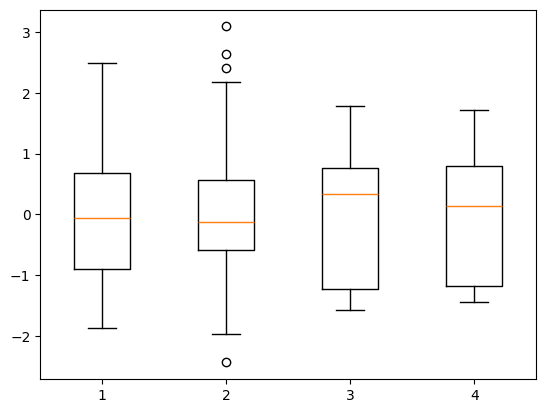

In [16]:
plt.boxplot(new_data)
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler
new_data = MinMaxScaler().fit_transform(iris_df)
round(pd.DataFrame(new_data).describe(), 2)

,0,1,2,3
count,150.00,150.00,150.00,150.00
mean,0.43,0.44,0.47,0.46
std,0.23,0.18,0.30,0.32
min,0.00,0.00,0.00,0.00
25%,0.22,0.33,0.10,0.08
50%,0.42,0.42,0.57,0.50
75%,0.58,0.54,0.69,0.71
max,1.00,1.00,1.00,1.00


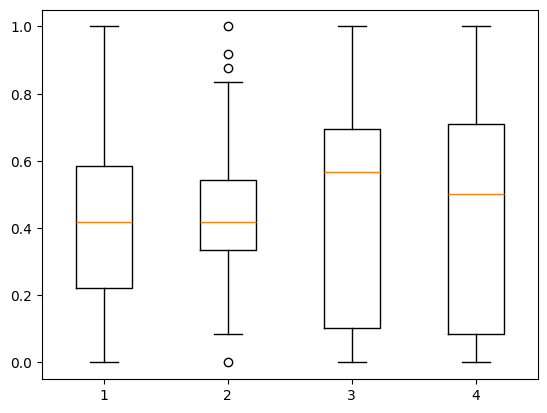

In [18]:
plt.boxplot(new_data)
plt.show()

### 2. KNN을 활용한 암데이터 예측

In [20]:
#1. 데이터 로드
cancer_df = pd.read_csv('./data/cancer.csv')
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [21]:
# cancer_df.info()
#y값 빈도수 체크 
cancer_df['target'].value_counts(normalize=True)

1    0.627417
0    0.372583
Name: target, dtype: float64

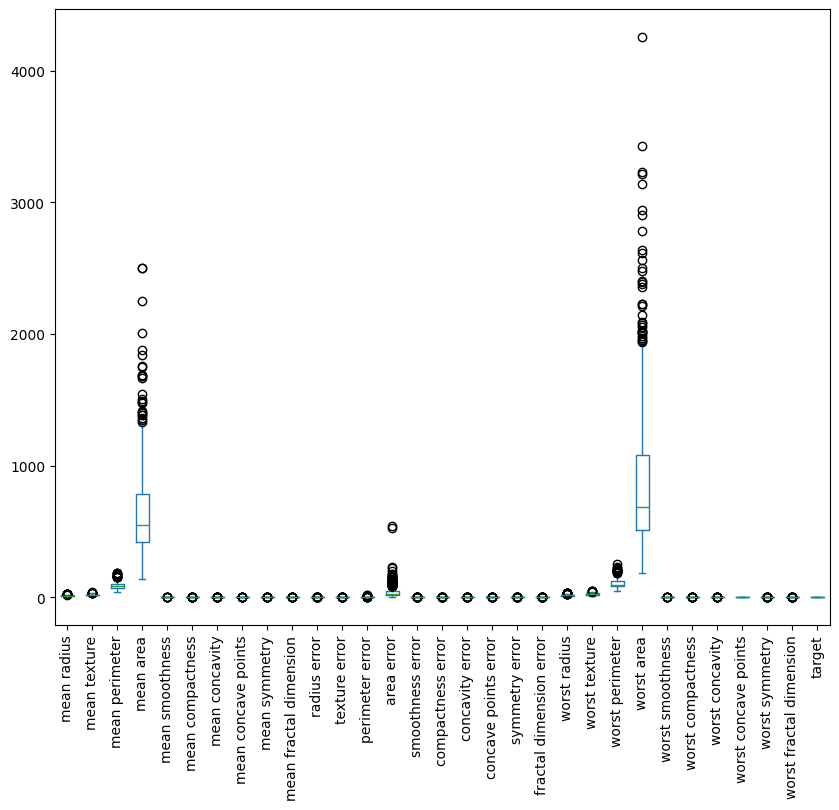

In [22]:
#시각화 실습 : pandas
cancer_df.plot(kind='box', figsize=(10,8), rot=90)
plt.show()

#### 스케일링을 적용 안한 코드

In [23]:
from sklearn.model_selection import train_test_split
#2. 데이터 분할
# cancer_df.head(1)
X = cancer_df.iloc[:, :-1]
y = cancer_df.iloc[:, -1]

#shape로 크기 확인
X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0, 
                                                    stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

#### 스케일링을 적용한 코드 (정규화)

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
    
X = cancer_df.iloc[:, :-1]
y = cancer_df.iloc[:, -1]
#X 데이터를 정규화
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    random_state=0, 
                                                    stratify=y)

In [25]:
#3. 모델생성, 학습
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
# 성능평가
y_pred = knn1.predict(X_test)
print(y_pred)
print(y_test.values)

[1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0
 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1
 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0]
[1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0
 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1
 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0]


In [27]:
#정확도 측정
train_sc = knn1.score(X_train, y_train)
test_sc = knn1.score(X_test, y_test)
print(f'train : {train_sc:.3f}, test : {test_sc:.3f}')

train : 0.986, test : 0.944


In [28]:
# K값(n_neighbors)을 1 ~ 10까지 변경하면서 
# 가장 좋은 성능을 내는 값을 구해보자

for k in range(1,11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_sc = model.score(X_train, y_train)
    test_sc = model.score(X_test, y_test)
    print(f'k={k}, train:{train_sc:.3f},test:{test_sc:.3f}, 차이:{(train_sc-test_sc):.3f}')

k=1, train:1.000,test:0.951, 차이:0.049
k=2, train:0.981,test:0.930, 차이:0.051
k=3, train:0.993,test:0.944, 차이:0.049
k=4, train:0.988,test:0.944, 차이:0.044
k=5, train:0.986,test:0.944, 차이:0.042
k=6, train:0.981,test:0.951, 차이:0.030
k=7, train:0.984,test:0.958, 차이:0.026
k=8, train:0.981,test:0.958, 차이:0.023
k=9, train:0.986,test:0.958, 차이:0.028
k=10, train:0.986,test:0.951, 차이:0.035


In [29]:
# K값(n_neighbors)을 1 ~ 10까지 변경하면서 
# 가장 좋은 성능을 내는 값을 구해보자
# train, test 성능을 리스트에 저장해서 그래프로 시각화 시켜보자

train_accL = []
test_accL = []

for k in range(1,11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_sc = model.score(X_train, y_train)
    test_sc = model.score(X_test, y_test)
    train_accL.append(train_sc)
    test_accL.append(test_sc)
print(train_accL)
print(test_accL)

[1.0, 0.9812206572769953, 0.9929577464788732, 0.9882629107981221, 0.9859154929577465, 0.9812206572769953, 0.9835680751173709, 0.9812206572769953, 0.9859154929577465, 0.9859154929577465]
[0.951048951048951, 0.9300699300699301, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.951048951048951, 0.958041958041958, 0.958041958041958, 0.958041958041958, 0.951048951048951]


In [30]:
#train_accL, test_accL 을 이용해서 train : , test : 
#zip 함수를 이용해서 
for train, test in zip(train_accL, test_accL):
    print(f'train : {train:.3f}, test : {test:.3f}')

train : 1.000, test : 0.951
train : 0.981, test : 0.930
train : 0.993, test : 0.944
train : 0.988, test : 0.944
train : 0.986, test : 0.944
train : 0.981, test : 0.951
train : 0.984, test : 0.958
train : 0.981, test : 0.958
train : 0.986, test : 0.958
train : 0.986, test : 0.951


In [31]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!')

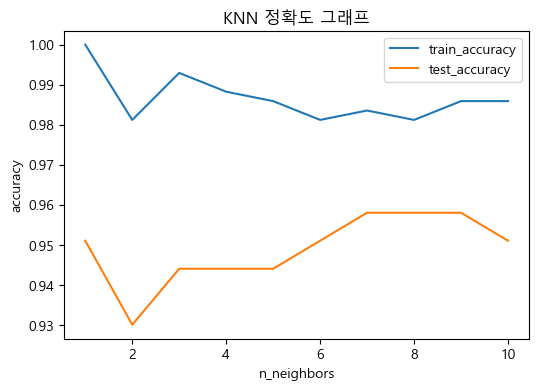

In [32]:
#시각화
x = range(1,11)

plt.figure(figsize=(6,4))
#train 성능을 선 그래프 시각화
plt.plot(x, train_accL, label='train_accuracy')
#test 성능을 선 그래프로 시각화
plt.plot(x, test_accL, label='test_accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.title('KNN 정확도 그래프')
plt.show()